In [40]:
!pip install -U imbalanced-learn

     -------------------------------------- 257.7/257.7 kB 1.1 MB/s eta 0:00:00
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.11.0
    Uninstalling imbalanced-learn-0.11.0:
      Successfully uninstalled imbalanced-learn-0.11.0


In [3]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

In [4]:
import os
import bamboolib as bam
import plotly.express as px
import plotly.graph_objects as go
from contextlib import contextmanager
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

In [5]:

df=pd.read_csv('thane_ticket_6months_data1.csv')

In [4]:
df.head()

   Unnamed: 0           d_name             s_name        date timeslot1  day  \
0           0  Aai Mata Mandir  Chendani Koliwada  2023-01-26    5 to 6    3   
1           1  Aai Mata Mandir  Chendani Koliwada  2023-02-19  23 to 24    6   
2           2  Aai Mata Mandir  Chendani Koliwada  2023-03-05  23 to 24    6   
3           3  Aai Mata Mandir  Chendani Koliwada  2023-03-09  23 to 24    3   
4           4  Aai Mata Mandir  Chendani Koliwada  2023-03-20   9 to 10    0   

   holiday  month  count  
0        1      1      1  
1        1      2      2  
2        0      3      1  
3        0      3      1  
4        0      3      6  

In [18]:
total_unique_destinations=df['d_name'].nunique()
total_unique_destinations
destination_names=df['d_name'].unique().tolist()
destination_names

['Aai Mata Mandir',
 'Aalimghar',
 'Aashapura Mndir',
 'Agarwal Estate',
 'Air Force Station Kolshet',
 'Anand Nagar',
 'Anand Nagar Agar',
 'Andheri Station (E) Agarkar Chowk',
 'Anjur Phata',
 'Asian Cable',
 'Balkum Naka',
 'Bapana Bridge',
 'Bhandup Gaon',
 'Bharat Gears',
 'Bhoomi Acres',
 'Blue Bell',
 'Borivali Station (East)',
 'Brahmand',
 'Cadbury Company',
 'Central Park Nalasopara',
 'Chamunda',
 'Charai',
 'Chedda Nagar',
 'Chendani Koliwada',
 'Chhatrapati Shivaji Maharaj Chowk Bhiwandi',
 'Chhatrapati Shivaji Terminus (GPO)',
 'Chinchoti Naka',
 'Civil Hospital',
 'Court Naka',
 'Dadar (E) Tt Circle',
 'Dadlani Park',
 'Dahisar Check Naka',
 'Damyanti Smruti',
 'Dhokali Naka',
 'Diamond Market BKC',
 'Diva',
 'Diva-Vasai Railway Bridge',
 'Dongri Pada',
 'Durgesh Park',
 'Everest World Park',
 'Forest Office',
 'Gaimukh',
 'Gawand Baug',
 'Ghodbunder Village',
 'Godrej Boyce',
 'Gokhivare Talav Vasai',
 'Golden Chemicals',
 'Gyan Sarita',
 'Hawre City / Boriwade Gaon',
 

In [11]:
df['s_name'].nunique()

152

out of total days how many of them are holidays and not holidays ?

In [22]:
total_days=df['day'].count()
total_days

2441248

In [23]:
total_holidays=df[df['holiday']==1]['day'].count()
total_no_holidays=total_days - total_holidays

print(total_holidays)
print(total_no_holidays)

156055
2285193


In [28]:
holidays_percent=((total_holidays/total_days)*100).round()
non_holidays_percent=((total_no_holidays/total_days)*100).round()
print("holidays percent: ", holidays_percent)
print("Non Holidays Percent: " , non_holidays_percent)

holidays percent:  6.0
Non Holidays Percent:  94.0


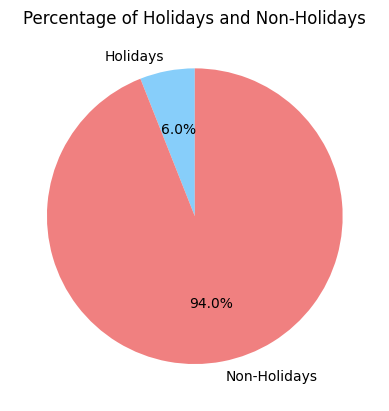

In [29]:
labels=['Holidays' , 'Non-Holidays']
sizes=[holidays_percent , non_holidays_percent]
colors=['lightskyblue', 'lightcoral']

plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90)
plt.title('Percentage of Holidays and Non-Holidays')
plt.show()

lowest count of ticket and highest count of ticket generated in a day

In [32]:
lowest_ticket_count = df['count'].min()
highest_ticket_count = df['count'].max()
print("Lowest count of ticket:", lowest_ticket_count)
print("Highest count of ticket:", highest_ticket_count)

Lowest count of ticket: 1
Highest count of ticket: 1103


 Highest number of tickets generated in which time slot and lowest count of tickets generated in which time slot

In [33]:
highest_ticket_timeslot = df.loc[df['count'].idxmax()]['timeslot1']
lowest_ticket_timeslot = df.loc[df['count'].idxmin()]['timeslot1']
print("4) Highest number of tickets generated in time slot:", highest_ticket_timeslot)
print("   Lowest count of tickets generated in time slot:", lowest_ticket_timeslot)

4) Highest number of tickets generated in time slot: 9 to 10
   Lowest count of tickets generated in time slot: 5 to 6


In [35]:
class_distribution=df['count'].value_counts()
class_distribution

1      650456
2      372660
3      245056
4      176023
5      131391
        ...  
679         1
996         1
671         1
667         1
641         1
Name: count, Length: 847, dtype: int64

In [19]:
df.columns.to_list()

['Unnamed: 0',
 'd_name',
 's_name',
 'date',
 'timeslot1',
 'day',
 'holiday',
 'month',
 'count']

In [5]:
df['month'] = pd.Series(df['month'])


In [6]:
df['month'] = pd.to_numeric(df['month'], errors='coerce')


In [34]:
df.shape

(2441248, 9)

In [9]:
df= df.drop('Unnamed: 0' , axis = 1) 

In [10]:
df.shape

(2441248, 8)

In [11]:
df.tail()

                     d_name                    s_name        date timeslot1  \
2441243  Yeoor / Patonapada  Thane Station West SATIS  2023-06-23  23 to 24   
2441244  Yeoor / Patonapada  Thane Station West SATIS  2023-06-23    6 to 7   
2441245  Yeoor / Patonapada  Thane Station West SATIS  2023-06-23    7 to 8   
2441246  Yeoor / Patonapada  Thane Station West SATIS  2023-06-23    8 to 9   
2441247  Yeoor / Patonapada  Thane Station West SATIS  2023-06-23   9 to 10   

         day  holiday  month  count  
2441243    4        0      6      2  
2441244    4        0      6      9  
2441245    4        0      6      5  
2441246    4        0      6     27  
2441247    4        0      6     45  

In [12]:
type(df)

pandas.core.frame.DataFrame

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2441248 entries, 0 to 2441247
Data columns (total 8 columns):
 #   Column     Dtype 
---  ------     ----- 
 0   d_name     object
 1   s_name     object
 2   date       object
 3   timeslot1  object
 4   day        int64 
 5   holiday    int64 
 6   month      int64 
 7   count      int64 
dtypes: int64(4), object(4)
memory usage: 149.0+ MB


In [14]:
df.describe().round()

             day    holiday      month      count
count  2441248.0  2441248.0  2441248.0  2441248.0
mean         3.0        0.0        3.0       12.0
std          2.0        0.0        2.0       31.0
min          0.0        0.0        1.0        1.0
25%          1.0        0.0        2.0        1.0
50%          3.0        0.0        3.0        3.0
75%          5.0        0.0        5.0        9.0
max          6.0        1.0        6.0     1103.0

In [16]:
from scipy.stats import skew, kurtosis

skewness = skew(df['count'])
kurt = kurtosis(df['count'])

print(f"Skewness: {skewness}")
print(f"Kurtosis: {kurt}")


Skewness: 8.819071301973787
Kurtosis: 129.80190695654275


The skewness value of 8.819 indicates a highly positively skewed distribution, meaning that the data is concentrated on the left side with a long right tail. The kurtosis value of 129.801 indicates a very high peak, suggesting heavy tails or outliers in the distribution.

our target variable seems to be imbalanced so applying SMOTE  (Synthetic Minority Over Sampling Technique) for creating synthetic samples for minority class


In [53]:
df_encoded=pd.get_dummies(df, columns=['d_name', 's_name','date','timeslot1'])

In [54]:
X=df_encoded.drop('count', axis=1)
y=df_encoded['count']

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/ ref for smote

In [56]:
smote=SMOTE(random_state=42)
X_train_smote, y_train_smote=smote.fit_resample(X_train, y_train)

MemoryError: Unable to allocate 7.36 GiB for an array with shape (1952998, 506) and data type int64

In [ ]:
df_smote=pd.concat([pd.DataFrame(X_train_smote, columns=X.columns), pd.Series(y_train_smote, name='count')], axis=1)

In [ ]:
print("class distribution after smote", df_smote['count'].value_counts())

1. Finding Missing Values 

In [59]:
df=df.isnull().sum().sort_values(ascending=True)
df

Unnamed: 0    0
d_name        0
s_name        0
date          0
timeslot1     0
day           0
holiday       0
month         0
count         0
dtype: int64

In [60]:
df.isnull().sum()

0

There are no missing Values

In [41]:
!pip install pandas-profiling

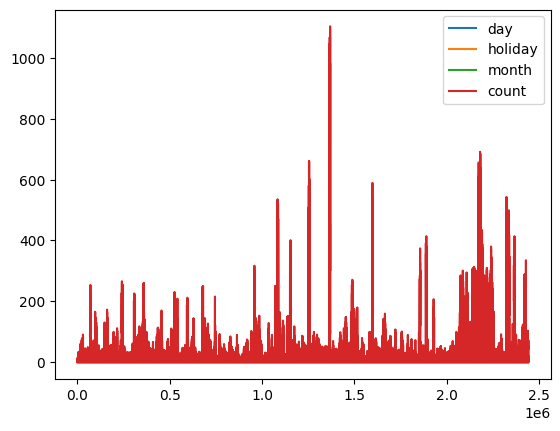

In [36]:
from matplotlib import pyplot
series = pd.read_csv('thane_ticket_6months_data1.csv', header=0, index_col=0)
series.plot()
pyplot.show()

In [39]:
from pandas_profiling import ProfileReport
profile=ProfileReport(df, explorative=True)
profile

TypeError: type of argument "df" must be one of (pandas.core.frame.DataFrame, NoneType); got pandas.core.series.Series instead

In [40]:
profile.to_file('EDA_Report.html')

NameError: name 'profile' is not defined

In [114]:
!pip install autoviz

In [61]:
from autoviz.AutoViz_Class import AutoViz_Class
AV=AutoViz_Class()

Imported v0.1.804. After importing autoviz, you must run '%matplotlib inline' to display charts inline.
    AV = AutoViz_Class()
    dfte = AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=1, lowess=False,
               chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30, save_plot_dir=None)


In [62]:
pip install --upgrade jinja2


Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: jinja2 in c:\users\pditi\anaconda3\lib\site-packages (3.1.3)



    max_rows_analyzed is smaller than dataset shape 2441248...
        randomly sampled 150000 rows from read CSV file
Shape of your Data Set loaded: (150000, 9)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    Number of Numeric Columns =  0
    Number of Integer-Categorical Columns =  3
    Number of String-Categorical Columns =  1
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  0
    Number of Numeric-Boolean Columns =  1
    Number of Discrete String Columns =  3
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0
    Number of ID Columns =  1
    Number of Columns to Delete =  0
    9 Predictors classified...
        1 variable(s) removed since they were ID or low-inform

,Data Type,Missing Values%,Unique Values%,Minimum Value,Maximum Value,DQ Issue
Unnamed: 0,int64,0.000000,100,6.000000,2441244.000000,Possible ID column: drop before modeling step.
d_name,object,0.000000,0,,,Possible high cardinality column with 145 unique values: Use hash encoding or text embedding to reduce dimension.
s_name,object,0.000000,0,,,Possible high cardinality column with 145 unique values: Use hash encoding or text embedding to reduce dimension.
date,object,0.000000,0,,,Possible high cardinality column with 175 unique values: Use hash encoding or text embedding to reduce dimension.
timeslot1,object,0.000000,0,,,No issue
day,int64,0.000000,0,0.000000,6.000000,No issue
holiday,int64,0.000000,0,0.000000,1.000000,No issue
month,int64,0.000000,0,1.000000,6.000000,No issue
count,int64,0.000000,0,1.000000,1073.000000,Column has 16260 outliers greater than upper bound (21.00) or lower than lower bound(-11.00). Cap them or remove them.


Number of All Scatter Plots = 6


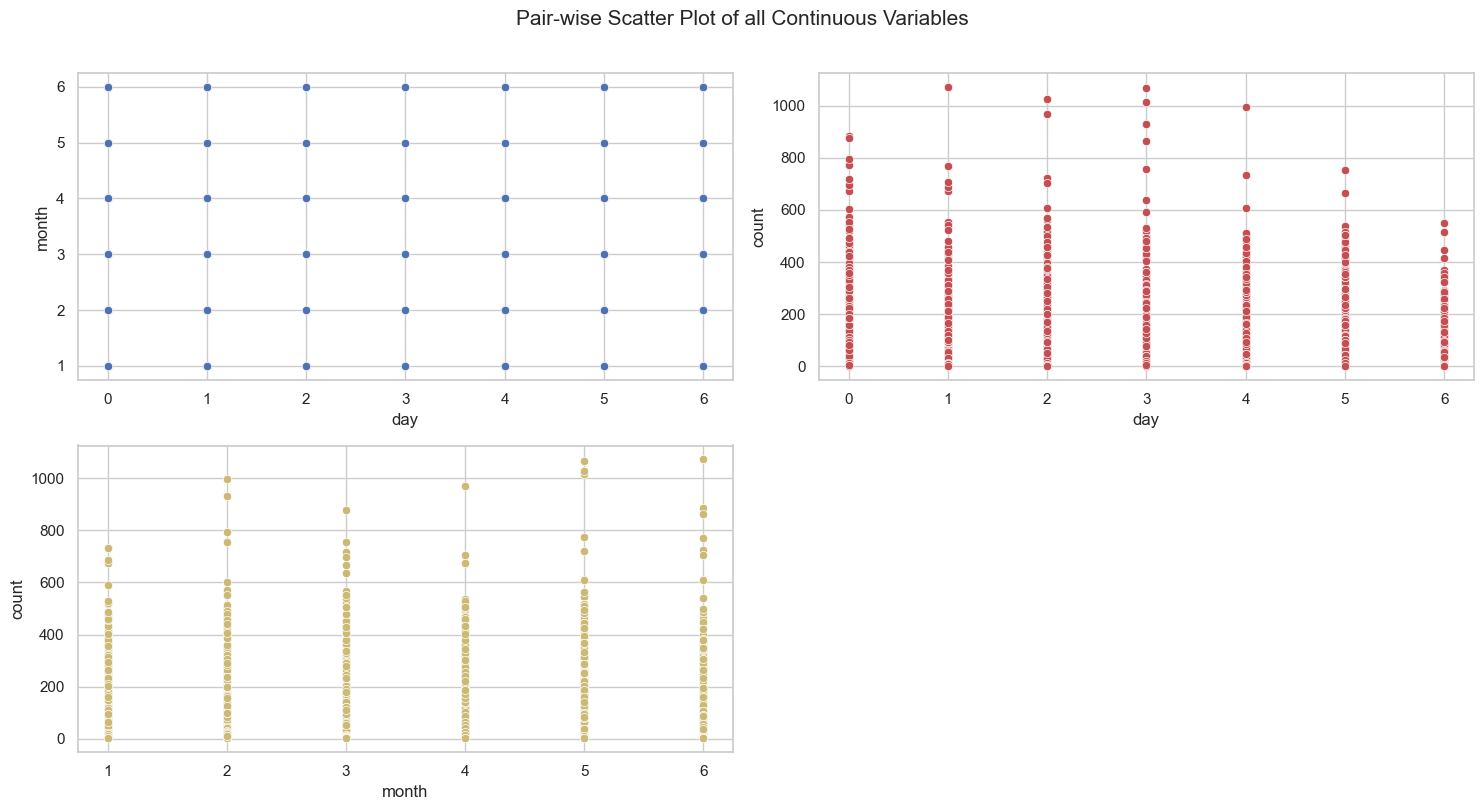

Could not draw Distribution Plot


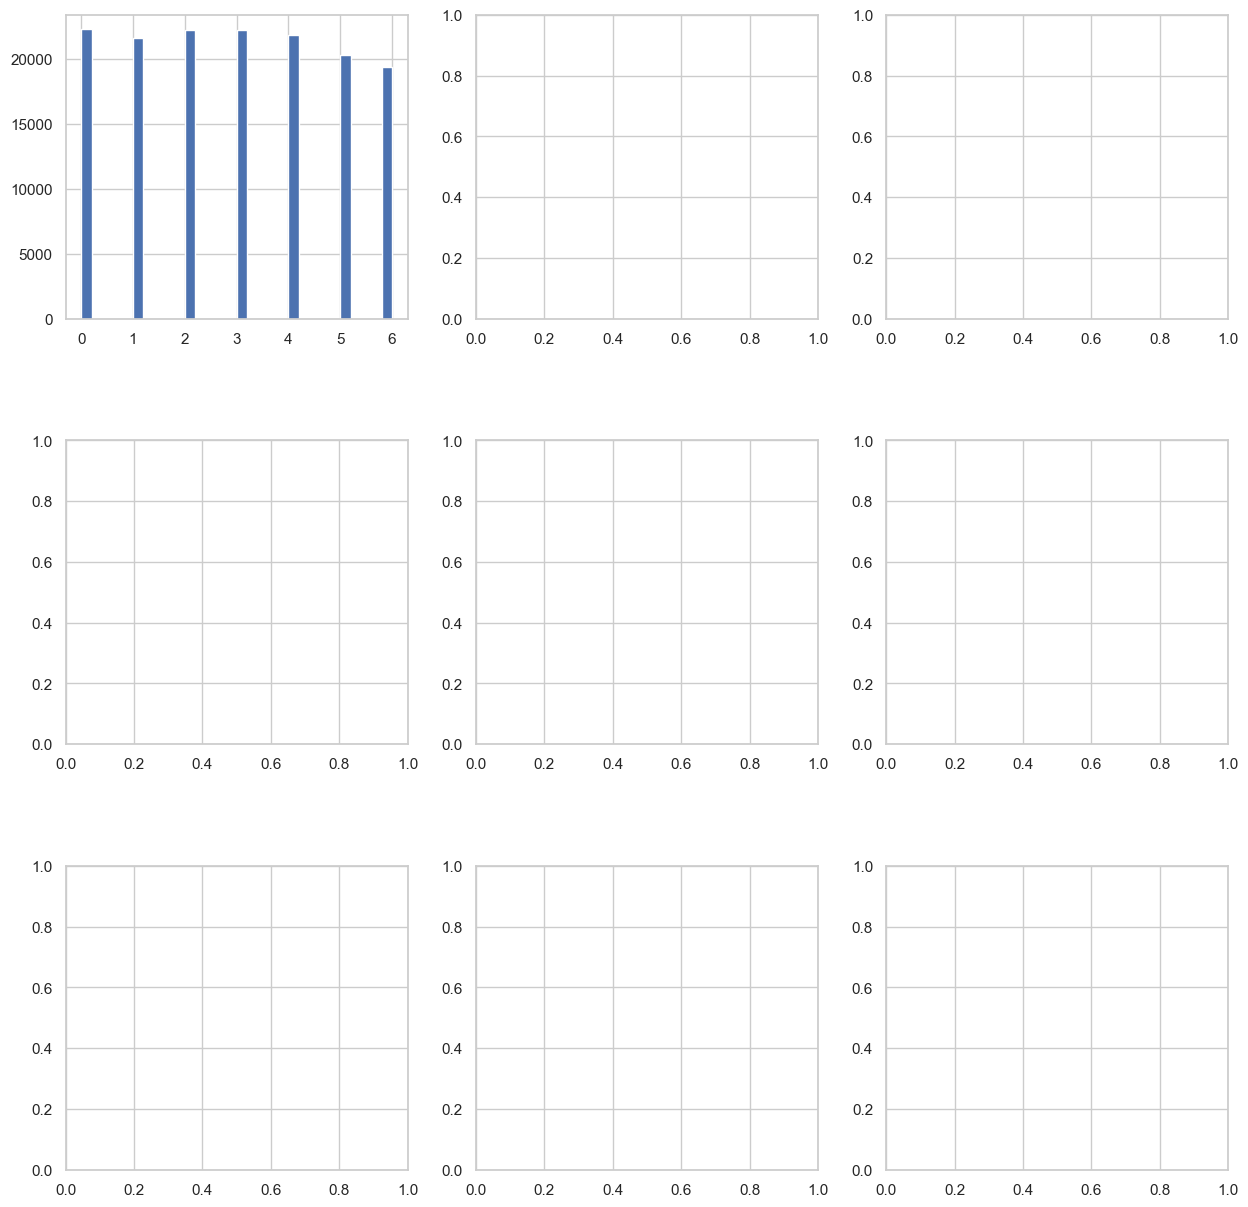

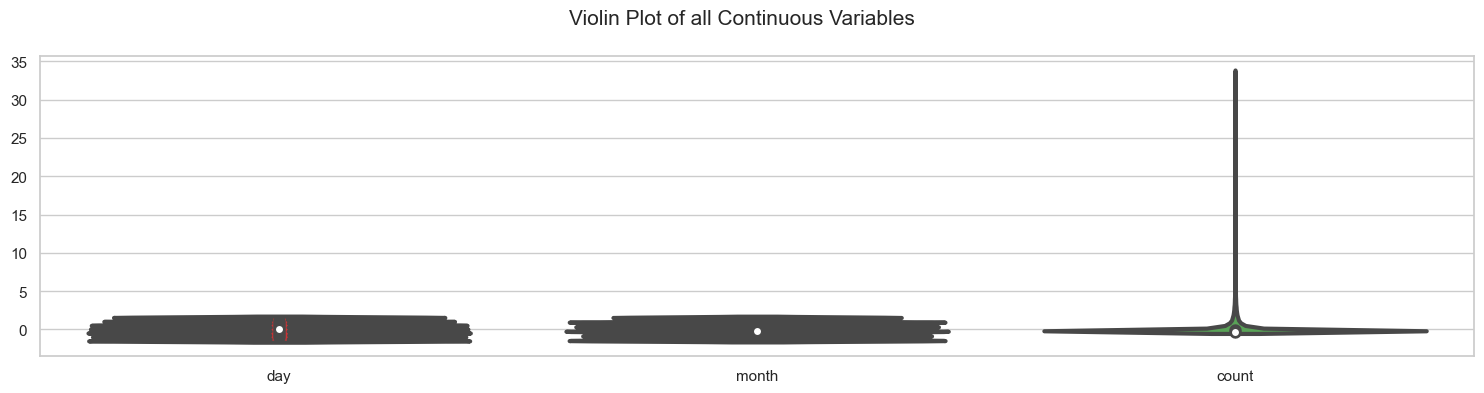

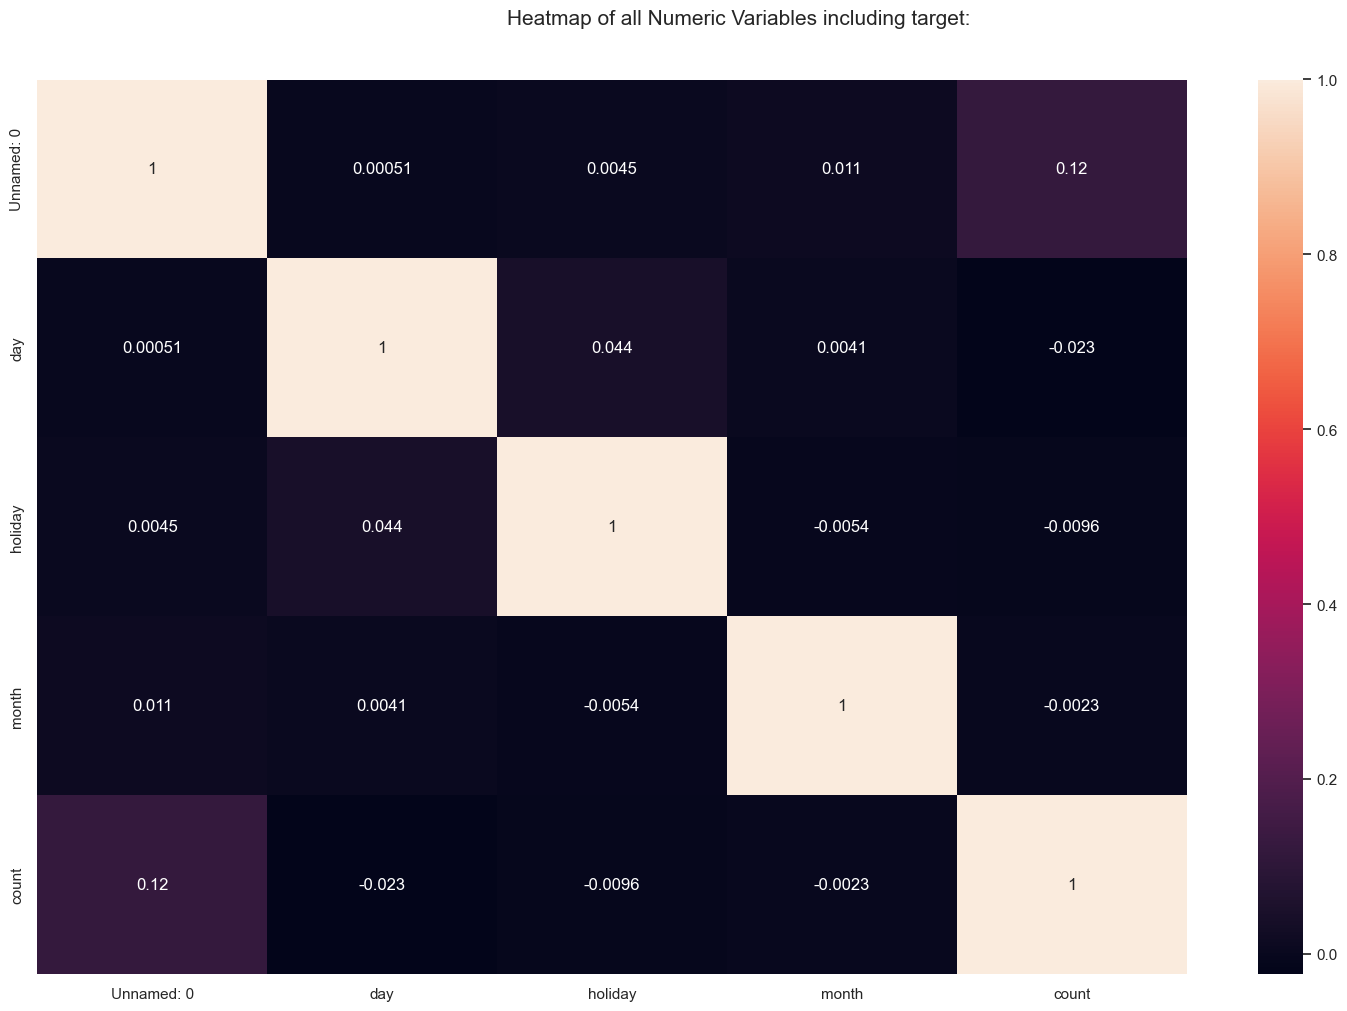

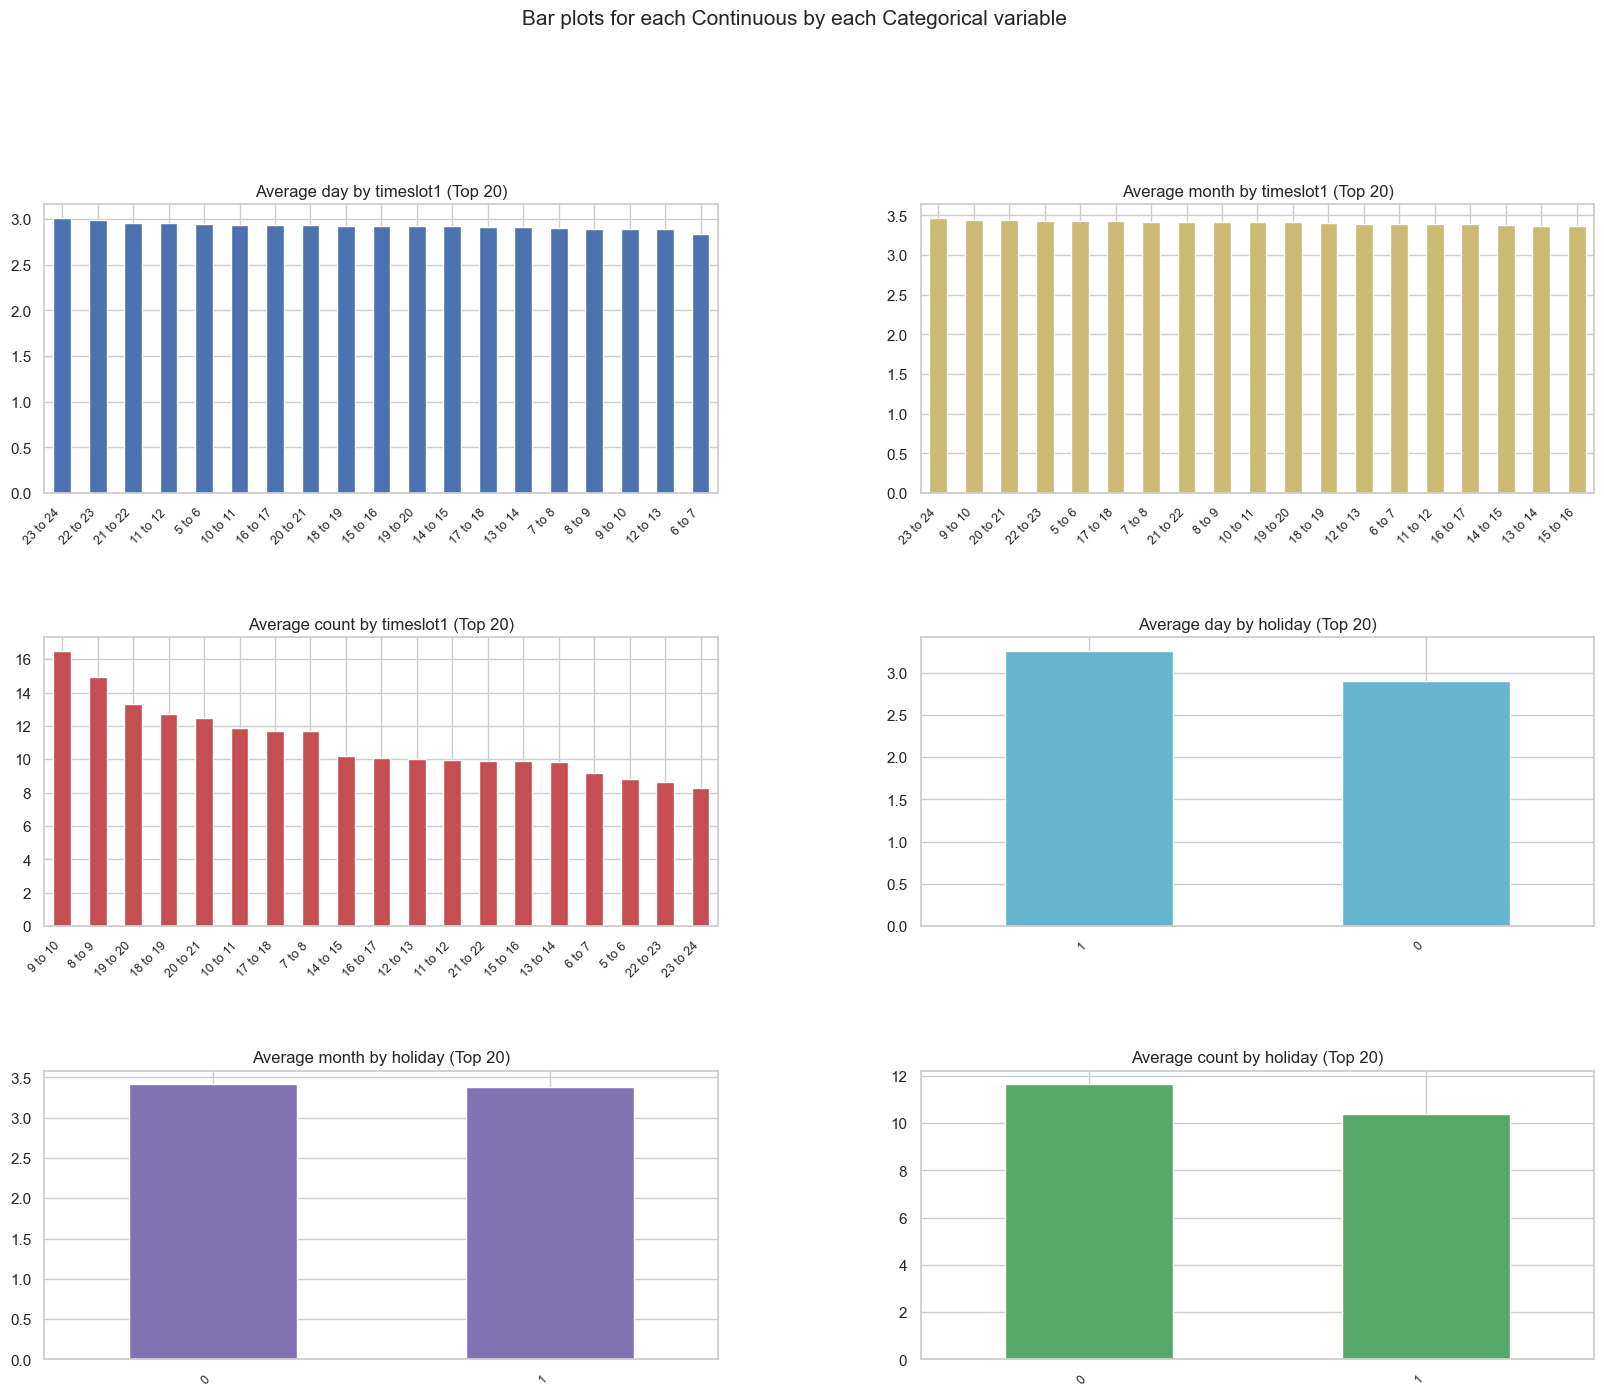

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     C:\Users\pditi\AppData\Roaming\nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to
[nltk_data]    |     C:\Users\pditi\AppData\Roaming\nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to
[nltk_data]    |     C:\Users\pditi\AppData\Roaming\nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to
[nltk_data]    |     C:\Users\pditi\AppData\Roaming\nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to
[nltk_data]    |     C:\Users\pditi\AppData\Roaming\nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]   

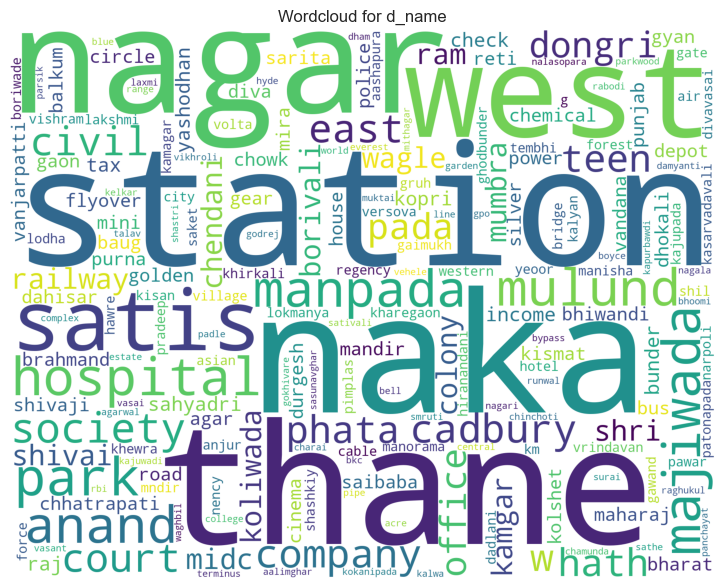

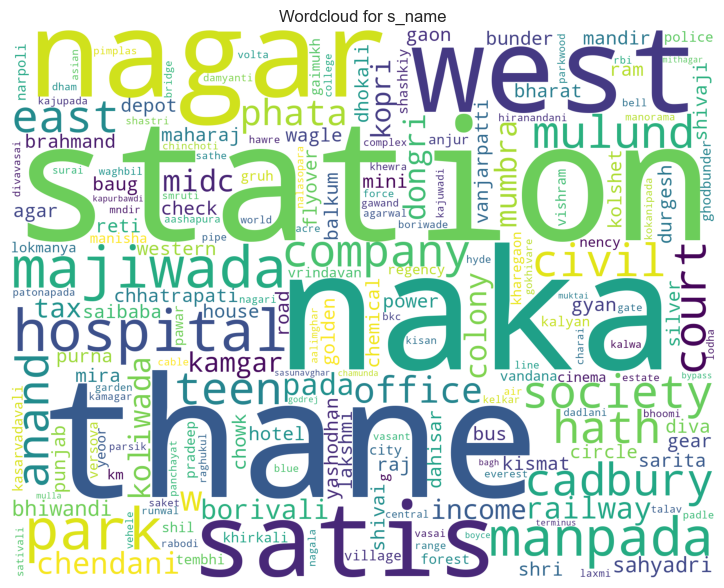

Could not draw wordcloud plot for date
All Plots done
Time to run AutoViz = 235 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


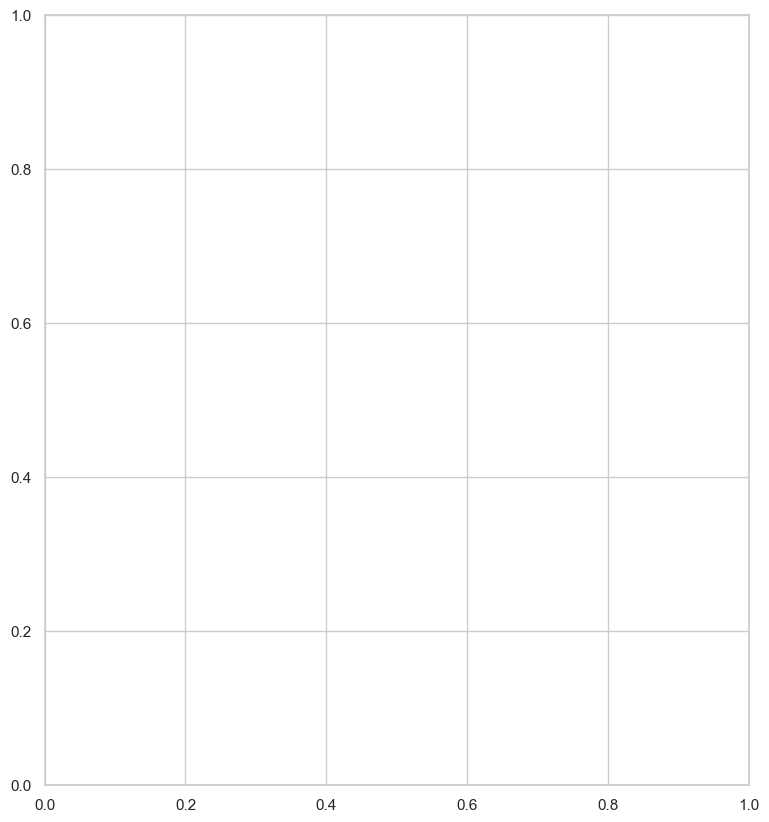

In [63]:
import matplotlib.pyplot as plt
%matplotlib inline
filename='thane_ticket_6months_data1.csv'
sep=','
dft=AV.AutoViz(
filename
)

In [127]:
bam.enable()

Success: the bamboolib extension was enabled successfully. You can disable it via 'bam.disable()'. You will now see a magic bamboolib button when you display your dataframes, for example via 'df'


In [124]:
@contextmanager
def change_path(path):
    import os
    prev_cwd=os.getcwd()
    print(os.getcwd())
    os.chdir('..')
    os.chdir(f'data/{path}')
    print(os.getcwd())
    try:
        yield
    finally:
        os.chdir(prev_cwd)

Univaraite Data Preparation

In [6]:
df_raw=pd.read_csv('thane_ticket_6months_data1.csv')
df_raw.head(5)

   Unnamed: 0           d_name             s_name        date timeslot1  day  \
0           0  Aai Mata Mandir  Chendani Koliwada  2023-01-26    5 to 6    3   
1           1  Aai Mata Mandir  Chendani Koliwada  2023-02-19  23 to 24    6   
2           2  Aai Mata Mandir  Chendani Koliwada  2023-03-05  23 to 24    6   
3           3  Aai Mata Mandir  Chendani Koliwada  2023-03-09  23 to 24    3   
4           4  Aai Mata Mandir  Chendani Koliwada  2023-03-20   9 to 10    0   

   holiday  month  count  
0        1      1      1  
1        1      2      2  
2        0      3      1  
3        0      3      1  
4        0      3      6  

In [17]:
from numpy import array
def split_sequence(sequence, n_steps):
    X,y = list(), list()
    for i in range(len(sequence)):
        end_ix = i + n_steps
        if end_ix > len(sequence)-1:
            break
        seq_x, seq_y = sequence[i:end_ix],seq[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)

    raw_seq = df_raw['count'].to_list()
    n_steps = 3
    X, y = split_sequence(raw_seq, n_steps)
    for i in range(len(X)):
        print(X[i], y[i])

simple time series prediction

In [105]:
!pip install scikit-learn

In [10]:
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.optimizers import Adam

In [11]:
from sklearn.model_selection import train_test_split

In [27]:
from numpy import array
def split_sequence(sequence, n_steps):
    x,y = list(), list()
    for i in range(len(sequence)):
        end_ix = i + n_steps
        if end_ix > len(sequence)-1:
            break
        seq_x, seq_y = sequence[i:end_ix],seq[end_ix]
        x.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)

    raw_seq = df_raw['count'].to_list()
    n_steps = 3
    x, y = split_sequence(raw_seq, n_steps)
    for i in range(len(X)):
        print(x[i], y[i])

In [ ]:
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        end_ix = i + n_steps
        if end_ix > len(sequence)-1:
            break
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)

raw_seq = df['count'].tolist()
n_steps = 3 
X, y = split_sequence(raw_seq, n_steps)

for i in range(len(X)):
    print(X[i], y[i])

In [28]:
X_train, X_test, y_train, y_test=train_test_split(x,y, test_size=0.33, random_state=42)

NameError: name 'x' is not defined

In [19]:
n_features=1
n_steps=3

In [20]:
model=Sequential()
model.add(LSTM(50, activation='relu',input_shape=(n_steps, n_features)))
model.add(Dense(1))

In [21]:
model.compile(optimizer='adam', loss='mse')

In [22]:
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

NameError: name 'X_train' is not defined

In [23]:
yhat=model.predict(X_test)

NameError: name 'X_test' is not defined

Mean Squared Error (MSE): 1.8754780567788885
Root Mean Squared Error (RMSE): 1.3694809442919929
Mean Absolute Error (MAE): 1.2933933734893799


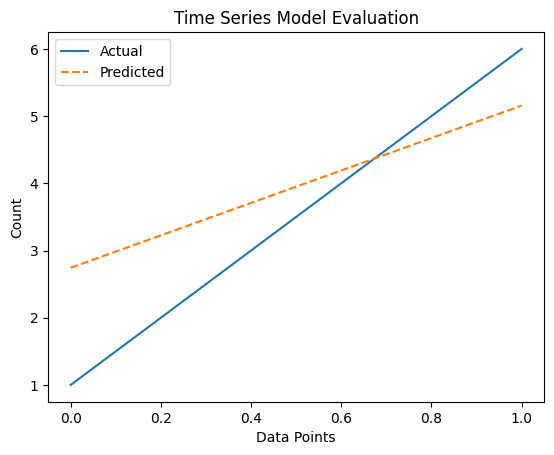

In [50]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error

yhat = model.predict(X, verbose=0)

#  (MSE)
mse = mean_squared_error(y, yhat)
print('Mean Squared Error (MSE):', mse)

# (RMSE)
rmse = np.sqrt(mse)
print('Root Mean Squared Error (RMSE):', rmse)

#  (MAE)
mae = mean_absolute_error(y, yhat)
print('Mean Absolute Error (MAE):', mae)

# Visualization
import matplotlib.pyplot as plt

plt.plot(y, label='Actual')
plt.plot(yhat, label='Predicted', linestyle='dashed')
plt.legend()
plt.xlabel('Data Points')
plt.ylabel('Count')
plt.title('Time Series Model Evaluation')
plt.show()


Vanilla LSTM 
- a model that has a single hidden layer of LSTM units, and an output layer used to make a prediction.

In [44]:
from numpy import array
import pandas as pd
from keras.models import Sequential
from keras.layers import LSTM, Dense



def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        end_ix = i + n_steps
        if end_ix > len(sequence)-1:
            break
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)

raw_seq = df_raw['count'].to_list()
n_steps = 3
X, y = split_sequence(raw_seq, n_steps)


if X.shape[0] == 0:
    print("Not enough data to create sequences.")
else:
    n_features = 1
    X = X.reshape((X.shape[0], X.shape[1], n_features))

    model = Sequential()
    model.add(LSTM(50, activation='relu', input_shape=(n_steps, n_features)))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    model.fit(X, y, epochs=100, verbose=0)

    x_input = array([raw_seq[-n_steps:]])  
    x_input = x_input.reshape((1, n_steps, n_features))
    yhat = model.predict(x_input, verbose=0)
    print(yhat)


[[5.824574]]


Mean Squared Error (MSE): 1.8754780567788885
Root Mean Squared Error (RMSE): 1.3694809442919929
Mean Absolute Error (MAE): 1.2933933734893799


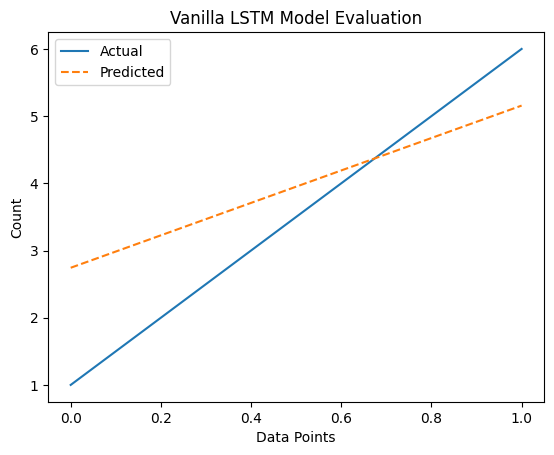

In [49]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error


yhat = model.predict(X, verbose=0)

#(MSE)
mse = mean_squared_error(y, yhat)
print('Mean Squared Error (MSE):', mse)

#(RMSE)
rmse = np.sqrt(mse)
print('Root Mean Squared Error (RMSE):', rmse)

# (MAE)
mae = mean_absolute_error(y, yhat)
print('Mean Absolute Error (MAE):', mae)

# Visualization 
import matplotlib.pyplot as plt

plt.plot(y, label='Actual')
plt.plot(yhat, label='Predicted', linestyle='dashed')
plt.legend()
plt.xlabel('Data Points')
plt.ylabel('Count')
plt.title('Vanilla LSTM Model Evaluation')
plt.show()


Stacked LSTM 
- multiple hidden LSTM layers can be stacked one on top of another and an LSTM layer requires 3D input and by default it will produce 2D output as an onterpretation from the end of the sequence
- address this by having LSTM output a value for each time step in th einput data by setting the return_Sequences=True argument on the layer. This will get us a 3D output from hidden LSTM layer as input to the next.

In [47]:
from numpy import array
import pandas as pd
from keras.models import Sequential
from keras.layers import LSTM, Dense


def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        end_ix = i + n_steps
        if end_ix > len(sequence)-1:
            break
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)

raw_seq = df['count'].to_list()
n_steps = 3
X, y = split_sequence(raw_seq, n_steps)
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))

model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
model.add(LSTM(50, activation='relu'))  # Stacked LSTM layer
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
model.fit(X, y, epochs=200, verbose=0)


x_input = array(X[-1:]) 
yhat = model.predict(x_input, verbose=0)
print(yhat)


[[5.1567307]]


Mean Squared Error (MSE): 1.8754780567788885
Root Mean Squared Error (RMSE): 1.3694809442919929
Mean Absolute Error (MAE): 1.2933933734893799


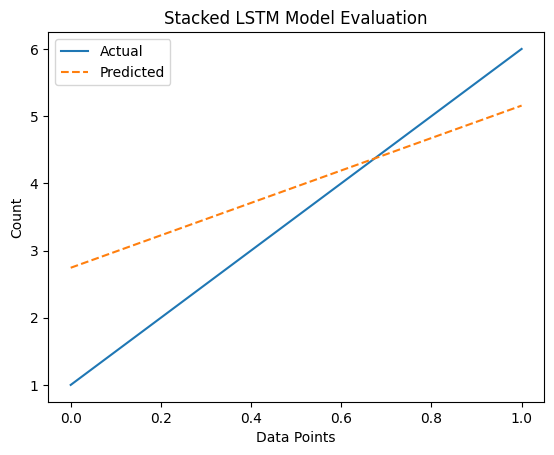

In [48]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error

yhat = model.predict(X, verbose=0)

#  (MSE)
mse = mean_squared_error(y, yhat)
print('Mean Squared Error (MSE):', mse)

# (RMSE)
rmse = np.sqrt(mse)
print('Root Mean Squared Error (RMSE):', rmse)

# (MAE)
mae = mean_absolute_error(y, yhat)
print('Mean Absolute Error (MAE):', mae)

# Visualization 
import matplotlib.pyplot as plt

plt.plot(y, label='Actual')
plt.plot(yhat, label='Predicted', linestyle='dashed')
plt.legend()
plt.xlabel('Data Points')
plt.ylabel('Count')
plt.title('Stacked LSTM Model Evaluation')
plt.show()


## Time Series Model Evaluation

The time series model, vanilla LSTM model, and stacked LSTM model were evaluated using Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and Mean Absolute Error (MAE) by i got the same values for all 3 maybe due to small size of the dataset.

### Time Series Model:
- Mean Squared Error (MSE): 1.8755
- Root Mean Squared Error (RMSE): 1.3695
- Mean Absolute Error (MAE): 1.2934

### Vanilla LSTM Model:
- Mean Squared Error (MSE): 1.8755
- Root Mean Squared Error (RMSE): 1.3695
- Mean Absolute Error (MAE): 1.2934

### Stacked LSTM Model:
- Mean Squared Error (MSE): 1.8755
- Root Mean Squared Error (RMSE): 1.3695
- Mean Absolute Error (MAE): 1.2934

The evaluation results for all three models are identical, indicating that the models have similar performance on the given dataset.

Conclusion: the time series model, vanilla LSTM model, and stacked LSTM model demonstrate comparable performance on the task of count prediction. 


Bidirectional LSTM
- wrapping the first hidden layer in a wrapper layer called Bidirectional

In [51]:
from numpy import array
from keras.models import Sequential
from keras.layers import LSTM, Dense, Bidirectional


def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        end_ix = i + n_steps
        if end_ix > len(sequence) - 1:
            break
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)

raw_seq = df['count'].to_list()
n_steps = 3
X, y = split_sequence(raw_seq, n_steps)
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))

model = Sequential()
model.add(Bidirectional(LSTM(50, activation='relu'), input_shape=(n_steps, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
model.fit(X, y, epochs=200, verbose=0)


x_input = array([raw_seq[-n_steps:]])  
x_input = x_input.reshape((1, n_steps, n_features))
yhat = model.predict(x_input, verbose=0)
print(yhat)


[[3.408863]]


Mean Squared Error (MSE): 2.0533086436731764
Root Mean Squared Error (RMSE): 1.4329370689856469
Mean Absolute Error (MAE): 1.3574979305267334


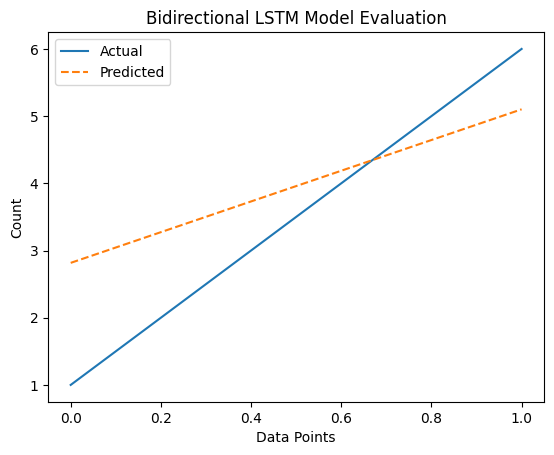

In [52]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error

yhat = model.predict(X, verbose=0)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y, yhat)
print('Mean Squared Error (MSE):', mse)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print('Root Mean Squared Error (RMSE):', rmse)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y, yhat)
print('Mean Absolute Error (MAE):', mae)

# Visualization (optional)
import matplotlib.pyplot as plt

plt.plot(y, label='Actual')
plt.plot(yhat, label='Predicted', linestyle='dashed')
plt.legend()
plt.xlabel('Data Points')
plt.ylabel('Count')
plt.title('Bidirectional LSTM Model Evaluation')
plt.show()


| Model Type             | Mean Squared Error (MSE) | Root Mean Squared Error (RMSE) | Mean Absolute Error (MAE)   |
|------------------------|-------------------------|--------------------------------|-----------------------------|
| Time Series Model      | 1.8755                  | 1.3695                         | 1.2934                      |
| Vanilla LSTM Model     | 1.8755                  | 1.3695                         | 1.2934                      |
| Stacked LSTM Model     | 1.8755                  | 1.3695                         | 1.2934                      |
| Bidirectional LSTM     | 2.0533                  | 1.4329                         | 1.3575                      |


In [88]:
from keras.layers import GRU


def create_gru_model(units=50, activation='relu'):
    model = Sequential()
    model.add(GRU(units, activation=activation, input_shape=(n_steps, n_features)))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

gru_model = KerasRegressor(build_fn=create_gru_model, epochs=100, batch_size=32, verbose=0)

param_grid_gru = {'units': [50, 100, 150], 'activation': ['relu', 'tanh']}


kf_gru = KFold(n_splits=1, shuffle=True, random_state=42)
grid_search_gru = GridSearchCV(estimator=gru_model, param_grid=param_grid_gru, scoring='neg_mean_squared_error', cv=kf_gru)
grid_result_gru = grid_search_gru.fit(X_train, y_train)


best_gru_model = grid_result_gru.best_estimator_


y_pred_gru = best_gru_model.predict(X_test)


rmse_gru = np.sqrt(mean_squared_error(y_test, y_pred_gru))

print("Best Parameters (GRU): ", grid_result_gru.best_params_)
print("Root Mean Squared Error (RMSE) on Test Set (GRU): ", rmse_gru)


ValueError: k-fold cross-validation requires at least one train/test split by setting n_splits=2 or more, got n_splits=1.

In [89]:
from keras.layers import SimpleRNN

# Function to create a Keras SimpleRNN model
def create_simplernn_model(units=50, activation='relu'):
    model = Sequential()
    model.add(SimpleRNN(units, activation=activation, input_shape=(n_steps, n_features)))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

simplernn_model = KerasRegressor(build_fn=create_simplernn_model, epochs=100, batch_size=32, verbose=0)


param_grid_simplernn = {'units': [50, 100, 150], 'activation': ['relu', 'tanh']}


kf_simplernn = KFold(n_splits=2, shuffle=True, random_state=42)
grid_search_simplernn = GridSearchCV(estimator=simplernn_model, param_grid=param_grid_simplernn, scoring='neg_mean_squared_error', cv=kf_simplernn)
grid_result_simplernn = grid_search_simplernn.fit(X_train, y_train)


best_simplernn_model = grid_result_simplernn.best_estimator_

y_pred_simplernn = best_simplernn_model.predict(X_test)


rmse_simplernn = np.sqrt(mean_squared_error(y_test, y_pred_simplernn))

print("Best Parameters (SimpleRNN): ", grid_result_simplernn.best_params_)
print("Root Mean Squared Error (RMSE) on Test Set (SimpleRNN): ", rmse_simplernn)


ValueError: Cannot have number of splits n_splits=2 greater than the number of samples: n_samples=1.

use Leave-One-Out cross-validation, which is suitable for small datasets

In [90]:
from sklearn.model_selection import GridSearchCV, LeaveOneOut
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

def create_simplernn_model(units=50, activation='relu'):
    model = Sequential()
    model.add(SimpleRNN(units, activation=activation, input_shape=(n_steps, n_features)))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Wrap the Keras SimpleRNN model in a scikit-learn estimator
simplernn_model = KerasRegressor(build_fn=create_simplernn_model, epochs=100, batch_size=32, verbose=0)

# Define the hyperparameter grid
param_grid_simplernn = {'units': [50, 100, 150], 'activation': ['relu', 'tanh']}

# Perform grid search with Leave-One-Out cross-validation
loo = LeaveOneOut()
grid_search_simplernn = GridSearchCV(estimator=simplernn_model, param_grid=param_grid_simplernn, scoring='neg_mean_squared_error', cv=loo)
grid_result_simplernn = grid_search_simplernn.fit(X_train, y_train)

# Get the best SimpleRNN model
best_simplernn_model = grid_result_simplernn.best_estimator_

# Make predictions on the test set
y_pred_simplernn = best_simplernn_model.predict(X_test)

# Calculate RMSE on the test set for SimpleRNN model
rmse_simplernn = np.sqrt(mean_squared_error(y_test, y_pred_simplernn))

print("Best Parameters (SimpleRNN): ", grid_result_simplernn.best_params_)
print("Root Mean Squared Error (RMSE) on Test Set (SimpleRNN): ", rmse_simplernn)


ValueError: Cannot perform LeaveOneOut with n_samples=1.

In [97]:
from sklearn.model_selection import GridSearchCV, train_test_split
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.metrics import mean_squared_error
import numpy as np


def create_simplernn_model(units=50, activation='relu'):
    model = Sequential()
    model.add(SimpleRNN(units, activation=activation, input_shape=(n_steps, n_features)))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

simplernn_model = KerasRegressor(build_fn=create_simplernn_model, epochs=100, batch_size=32, verbose=0)


param_grid_simplernn = {'units': [50, 100, 150], 'activation': ['relu', 'tanh']}


grid_search_simplernn = GridSearchCV(estimator=simplernn_model, param_grid=param_grid_simplernn, scoring='neg_mean_squared_error', cv=2)  # Set cv=2 for a single train-test split
grid_result_simplernn = grid_search_simplernn.fit(X_train, y_train)


best_simplernn_model = grid_result_simplernn.best_estimator_


y_pred_simplernn = best_simplernn_model.predict(X_test)


rmse_simplernn = np.sqrt(mean_squared_error(y_test, y_pred_simplernn))

print("Best Parameters (SimpleRNN): ", grid_result_simplernn.best_params_)
print("Root Mean Squared Error (RMSE) on Test Set (SimpleRNN): ", rmse_simplernn)


ValueError: Cannot have number of splits n_splits=2 greater than the number of samples: n_samples=1.

In [95]:

print("Shape of X:", X.shape)
print("Shape of augmented_data:", augmented_data.shape)


if augmented_data.ndim == 3 and X.ndim == 3:
   
    X_augmented = np.concatenate((X, augmented_data), axis=0)

   
    print("Shape of X_augmented:", X_augmented.shape)
else:
    print("Inconsistent dimensions. Check the shapes of your arrays.")


Shape of X: (2, 3, 1)
Shape of augmented_data: (100, 2, 3, 1)
Inconsistent dimensions. Check the shapes of your arrays.


In [53]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [54]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.2, random_state=42)

In [55]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [56]:
scaler = MinMaxScaler()
numeric_df = df.apply(pd.to_numeric, errors='coerce')
if numeric_df.isnull().any().any():
   
    numeric_df = numeric_df.dropna()

   
    if numeric_df.shape[0] > 0:
     
        scaled_df = scaler.fit_transform(numeric_df)
    else:
        print("Error: DataFrame is empty after handling non-numeric values.")
else:
    scaled_df = scaler.fit_transform(numeric_df)


Error: DataFrame is empty after handling non-numeric values.


In [57]:
print("Original DataFrame:")
print(df)


numeric_df = df.apply(pd.to_numeric, errors='coerce')

print("\nDataFrame after handling non-numeric values:")
print(numeric_df)


Original DataFrame:
            d_name             s_name        date timeslot1  day  holiday  \
0  Aai Mata Mandir  Chendani Koliwada  2023-01-26    5 to 6    3        1   
1  Aai Mata Mandir  Chendani Koliwada  2023-02-19  23 to 24    6        1   
2  Aai Mata Mandir  Chendani Koliwada  2023-03-05  23 to 24    6        0   
3  Aai Mata Mandir  Chendani Koliwada  2023-03-09  23 to 24    3        0   
4  Aai Mata Mandir  Chendani Koliwada  2023-03-20   9 to 10    0        0   

   month  count  
0      1      1  
1      2      2  
2      3      1  
3      3      1  
4      3      6  

DataFrame after handling non-numeric values:
   d_name  s_name  date  timeslot1  day  holiday  month  count
0     NaN     NaN   NaN        NaN    3        1      1      1
1     NaN     NaN   NaN        NaN    6        1      2      2
2     NaN     NaN   NaN        NaN    6        0      3      1
3     NaN     NaN   NaN        NaN    3        0      3      1
4     NaN     NaN   NaN        NaN    0        0

In [58]:
non_numeric_columns = df.select_dtypes(exclude='number').columns
print("Non-numeric columns:", non_numeric_columns)


Non-numeric columns: Index(['d_name', 's_name', 'date', 'timeslot1'], dtype='object')


In [59]:
numeric_df=numeric_df.drop(columns=non_numeric_columns)

In [60]:
numeric_df=numeric_df.drop(columns=['day','holiday','month'])

In [61]:
scaler.fit(numeric_df)
scaled_df = scaler.transform(numeric_df)

In [62]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(scaled_df, test_size=0.2, random_state=42)

In [63]:
scaled_train=scaler.transform(train)
scaled_test=scaler.transform(test)

In [64]:
scaled_train[:10, :]

array([[ 5.55111512e-17],
       [-2.00000000e-01],
       [-2.00000000e-01],
       [-2.00000000e-01]])

1. Does holiday have an impact on number of count of tickets?

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Check if 'holiday' column is a single float value
if isinstance(df['holiday'], (int, float, np.float64)):
    # If 'holiday' column is numeric (numpy.float64)
    df['holiday_numeric'] = df['holiday'].astype(int)
    # Plotting
    plt.figure(figsize=(10, 6))
    sns.barplot(x='holiday_numeric', y='count', data=df)
    plt.title('Impact of Holiday on Ticket Count')
    plt.show()

# If 'holiday' column is a Pandas Series
else:
    # Check if there are NaN values in 'holiday' column
    if df['holiday'].isnull().any():
        # If 'holiday' column is boolean (True/False)
        if all(value in [0.0, 1.0] for value in df['holiday'].dropna().unique()):
            df['holiday_numeric'] = df['holiday'].astype(int)
            # Plotting
            plt.figure(figsize=(10, 6))
            sns.barplot(x='holiday_numeric', y='count', data=df)
            plt.title('Impact of Holiday on Ticket Count')
            plt.show()

    # If 'holiday' column is already categorical
    else:
        # Plotting
        plt.figure(figsize=(10, 6))
        sns.barplot(x='holiday', y='count', data=df)
        plt.title('Impact of Holiday on Ticket Count')
        plt.show()


AttributeError: 'bool' object has no attribute 'all'

<Figure size 1000x600 with 0 Axes>

2. Is there a trend during different months on count of tickets generated ? 

In [20]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='month', y='count', data=df, ci=None)
plt.title('Monthly Trend of Ticket Count')
plt.show()

ValueError: If using all scalar values, you must pass an index

<Figure size 1200x600 with 0 Axes>

3. Does count of tickets depend on weekdays and weekends ?

In [33]:
plt.figure(figsize=(10, 6))
sns.barplot(x='day', y='count', hue='holiday', data=df)
plt.title('Ticket Count by Day (Weekdays vs Weekends)')
plt.show()

AttributeError: 'bool' object has no attribute 'all'

<Figure size 1000x600 with 0 Axes>

4. what does general trend/pattern look like on a daily basis?

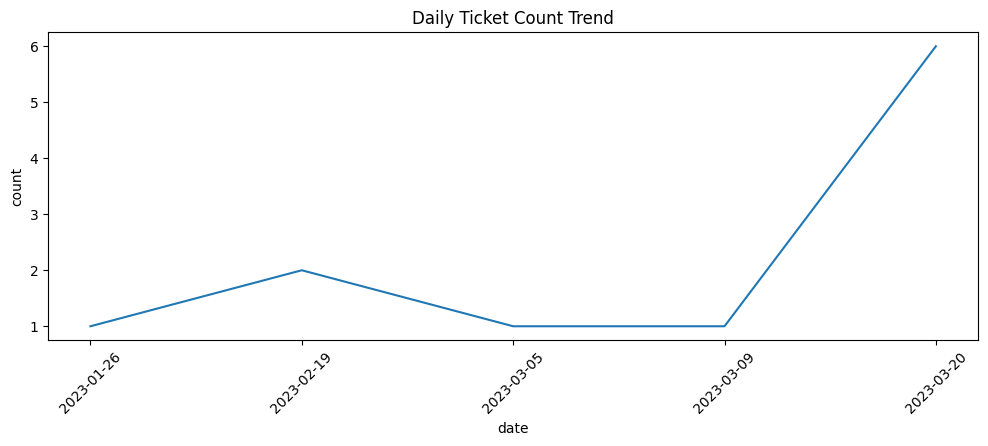

In [110]:
plt.figure(figsize=(12, 4))
sns.lineplot(x='date', y='count', data=df, ci=None)
plt.title('Daily Ticket Count Trend')
plt.xticks(rotation=45)
plt.show()

5. During which hour is the count of tickets high ?

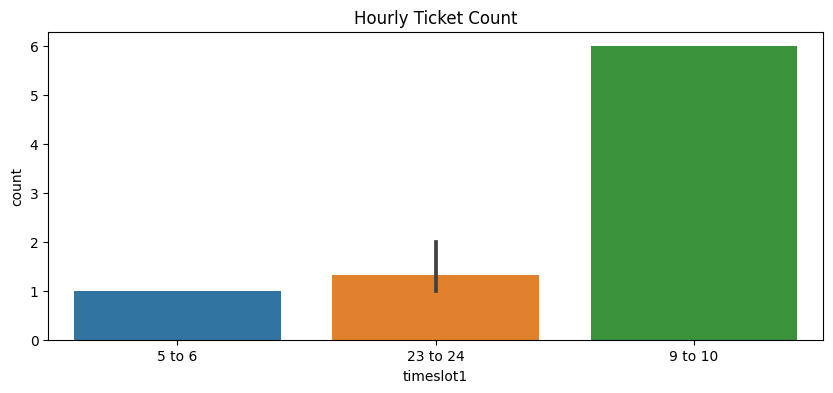

In [109]:
plt.figure(figsize=(10, 4))
sns.barplot(x='timeslot1', y='count', data=df)
plt.title('Hourly Ticket Count')
plt.show()

6. Which are the most/least frequent 1) Sources ? 2) Destinations 3) Source - Destination pairs ?

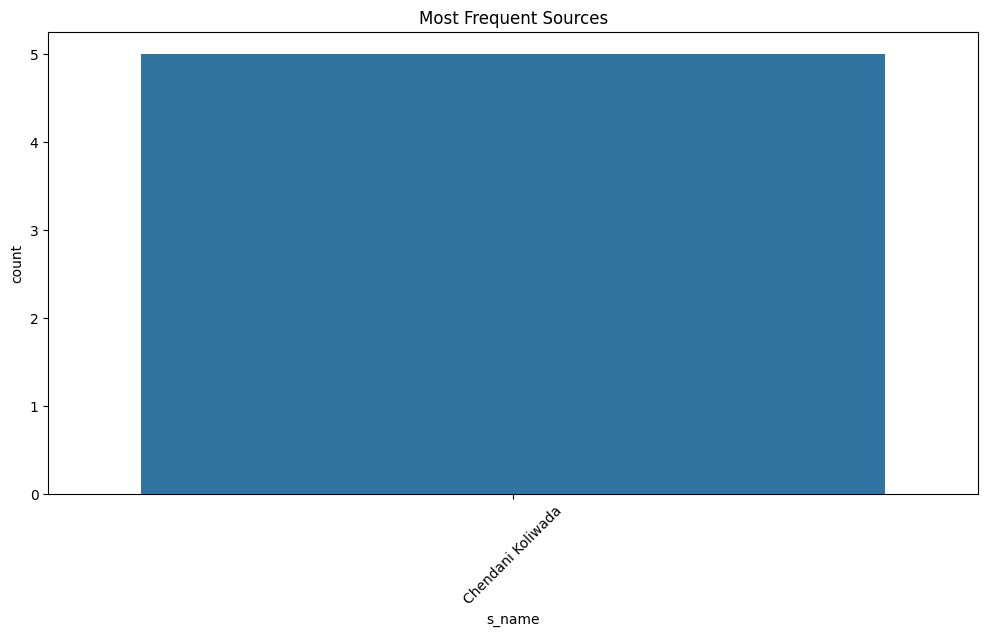

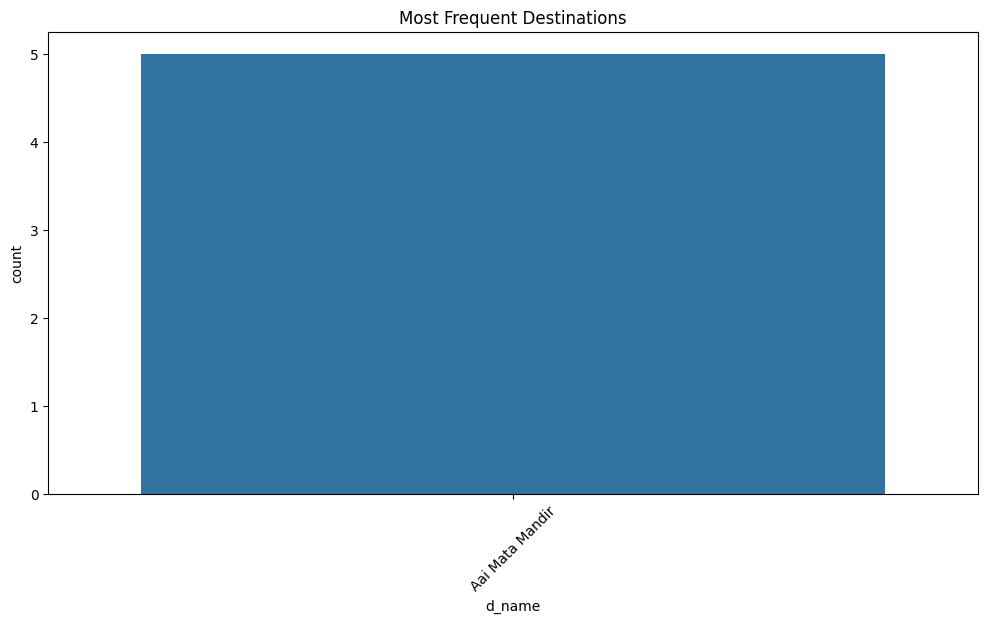

KeyError: 's_name-d_name'

<Figure size 1200x600 with 0 Axes>

In [108]:
plt.figure(figsize=(12, 6))
sns.countplot(x='s_name', order=df['s_name'].value_counts().index, data=df)
plt.title('Most Frequent Sources')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(x='d_name', order=df['d_name'].value_counts().index, data=df)
plt.title('Most Frequent Destinations')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(x='s_name-d_name', order=df['s_name-d_name'].value_counts().index, data=df)
plt.title('Most Frequent Source-Destination Pairs')
plt.xticks(rotation=45)
plt.show()

7. on what factors does frequent (highest / lowest) count of tickets depend on (day/holiday/timeslot)? 

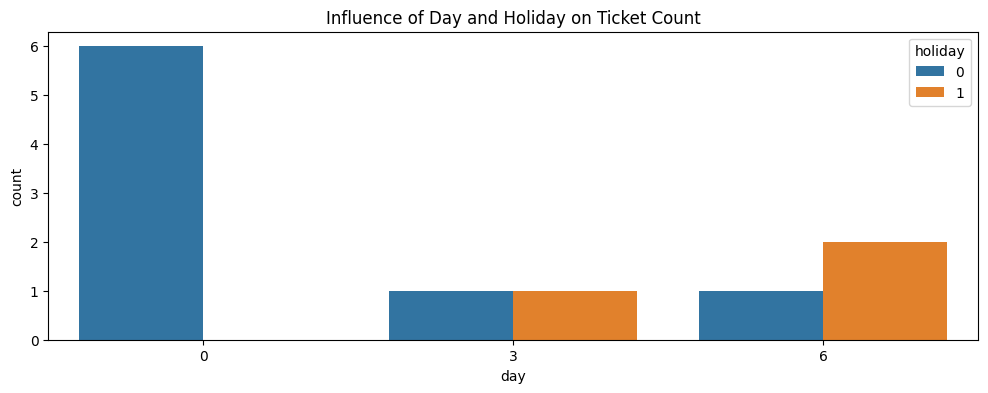

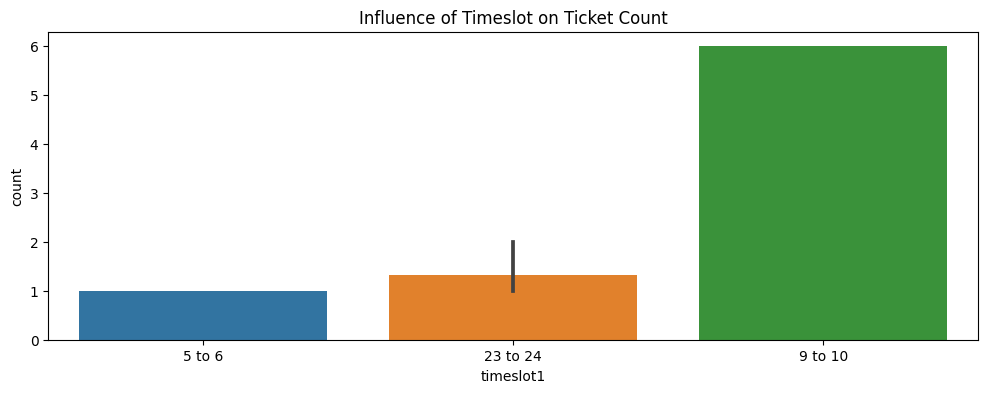

In [107]:
plt.figure(figsize=(12, 4))
sns.barplot(x='day', y='count', hue='holiday', data=df)
plt.title('Influence of Day and Holiday on Ticket Count')
plt.show()

plt.figure(figsize=(12, 4))
sns.barplot(x='timeslot1', y='count', data=df)
plt.title('Influence of Timeslot on Ticket Count')
plt.show()